## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""

'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.
C:\Users\amonr\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\amonr\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\amonr\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\amonr\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [11]:
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (50000, 3072)
x_test shape:  (10000, 3072)
y_train shape:  (50000, 10)
y_test shape:  (10000, 10)


In [13]:
"""Code Here
建立你的神經網路
"""
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=256, input_shape=(3072, ), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 830,250
Trainable params: 830,250
Non-trainable params: 0
_________________________________________________________________


In [14]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [15]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [16]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 104us/step - loss: 1.9675 - accuracy: 0.2886 - val_loss: 1.8390 - val_accuracy: 0.3355
Epoch 2/100
50000/50000 [==============================] - 5s 94us/step - loss: 1.7612 - accuracy: 0.3655 - val_loss: 1.7748 - val_accuracy: 0.3663
Epoch 3/100
50000/50000 [==============================] - 5s 92us/step - loss: 1.6712 - accuracy: 0.3992 - val_loss: 1.6351 - val_accuracy: 0.4099
Epoch 4/100
50000/50000 [==============================] - 5s 93us/step - loss: 1.6172 - accuracy: 0.4197 - val_loss: 1.5942 - val_accuracy: 0.4347
Epoch 5/100
50000/50000 [==============================] - 5s 95us/step - loss: 1.5572 - accuracy: 0.4418 - val_loss: 1.5529 - val_accuracy: 0.4417
Epoch 6/100
50000/50000 [==============================] - 5s 95us/step - loss: 1.5199 - accuracy: 0.4573 - val_loss: 1.5903 - val_accuracy: 0.4372
Epoch 7/100
50000/50000 [==============================] - 5

50000/50000 [==============================] - 4s 89us/step - loss: 0.8974 - accuracy: 0.6805 - val_loss: 1.5074 - val_accuracy: 0.5236
Epoch 55/100
50000/50000 [==============================] - 4s 86us/step - loss: 0.8818 - accuracy: 0.6844 - val_loss: 1.5138 - val_accuracy: 0.5244
Epoch 56/100
50000/50000 [==============================] - 4s 87us/step - loss: 0.8839 - accuracy: 0.6822 - val_loss: 1.5469 - val_accuracy: 0.5146
Epoch 57/100
50000/50000 [==============================] - 4s 86us/step - loss: 0.8756 - accuracy: 0.6846 - val_loss: 1.5780 - val_accuracy: 0.5128
Epoch 58/100
50000/50000 [==============================] - 4s 86us/step - loss: 0.8623 - accuracy: 0.6904 - val_loss: 1.5477 - val_accuracy: 0.5231
Epoch 59/100
50000/50000 [==============================] - 4s 86us/step - loss: 0.8682 - accuracy: 0.6886 - val_loss: 1.6296 - val_accuracy: 0.5025
Epoch 60/100
50000/50000 [==============================] - 4s 86us/step - loss: 0.8567 - accuracy: 0.6923 - val_loss: 

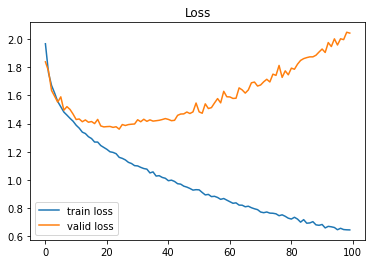

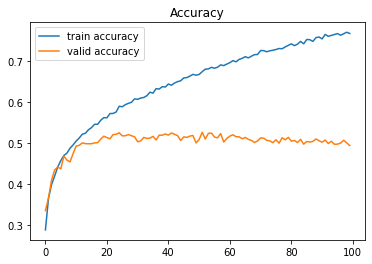

In [18]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()